# Prediction of loss of bank customers <a class='tocSkip'></a>

**Beta Bank** customers are leaving little by little on a monthly basis. The bank's central management discovered that it is more affordable to retain existing customers than to attract new customers.

The goal is to build a model that predicts whether or not a customer will leave the bank based on historical data on each customer's behavior and the termination of contracts with the bank. The model should have the maximum value of **_F1_** possible. F1 is a metric that tells us about the relationship between the sensitivity (recall) and the accuracy of the model. Additionally, the resulting model will be evaluated using the AUC-ROC metric.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-and-data-preprocessing" data-toc-modified-id="Download-and-data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download and data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Encode-of-categorical-variables" data-toc-modified-id="Encode-of-categorical-variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Encode of categorical variables</a></span></li><li><span><a href="#Scaling-of-numeric-variables" data-toc-modified-id="Scaling-of-numeric-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scaling of numeric variables</a></span></li><li><span><a href="#Data-division" data-toc-modified-id="Data-division-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data division</a></span></li></ul></li><li><span><a href="#Examining-class-balance" data-toc-modified-id="Examining-class-balance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examining class balance</a></span><ul class="toc-item"><li><span><a href="#Unbalanced-decision-tree" data-toc-modified-id="Unbalanced-decision-tree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Unbalanced decision tree</a></span></li><li><span><a href="#Random-forest-with-imbalance" data-toc-modified-id="Random-forest-with-imbalance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random forest with imbalance</a></span></li><li><span><a href="#Logistic-regression-with-imbalance" data-toc-modified-id="Logistic-regression-with-imbalance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic regression with imbalance</a></span></li><li><span><a href="#Conclusions:-models-with-class-imbalance" data-toc-modified-id="Conclusions:-models-with-class-imbalance-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusions: models with class imbalance</a></span></li></ul></li><li><span><a href="#Model-improvement" data-toc-modified-id="Model-improvement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model improvement</a></span><ul class="toc-item"><li><span><a href="#Adjustment-of-class-weights" data-toc-modified-id="Adjustment-of-class-weights-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adjustment of class weights</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-with-balanced-classes" data-toc-modified-id="Decision-tree-with-balanced-classes-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Decision tree with balanced classes</a></span></li><li><span><a href="#Random-forest-with-balanced-classes" data-toc-modified-id="Random-forest-with-balanced-classes-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Random forest with balanced classes</a></span></li><li><span><a href="#Logistic-regression-with-balanced-classes" data-toc-modified-id="Logistic-regression-with-balanced-classes-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Logistic regression with balanced classes</a></span></li><li><span><a href="#Comparison-of-models-with-and-without-class-balance" data-toc-modified-id="Comparison-of-models-with-and-without-class-balance-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Comparison of models with and without class balance</a></span></li></ul></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-with-upsampling" data-toc-modified-id="Decision-tree-with-upsampling-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Decision tree with upsampling</a></span></li><li><span><a href="#Random-forest-with-upsampling" data-toc-modified-id="Random-forest-with-upsampling-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Random forest with upsampling</a></span></li><li><span><a href="#Logistic-regression-with-upsampling" data-toc-modified-id="Logistic-regression-with-upsampling-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Logistic regression with upsampling</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-with-dowsampling" data-toc-modified-id="Decision-tree-with-dowsampling-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision tree with dowsampling</a></span></li><li><span><a href="#Random-forest-with-dowsampling" data-toc-modified-id="Random-forest-with-dowsampling-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Random forest with dowsampling</a></span></li><li><span><a href="#Logistic-regression-with-downsampling" data-toc-modified-id="Logistic-regression-with-downsampling-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Logistic regression with downsampling</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model Comparison</a></span><ul class="toc-item"><li><span><a href="#F1-under-different-scenarios" data-toc-modified-id="F1-under-different-scenarios-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>F1 under different scenarios</a></span></li><li><span><a href="#AUC-ROC-under-different-scenarios" data-toc-modified-id="AUC-ROC-under-different-scenarios-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>AUC-ROC under different scenarios</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Final-test-of-the-model" data-toc-modified-id="Final-test-of-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final test of the model</a></span><ul class="toc-item"><li><span><a href="#Conclusion-final-model" data-toc-modified-id="Conclusion-final-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion final model</a></span></li></ul></li></ul></div>

In [1]:
# Load libraries

# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Data preprocessing and model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Download and data preprocessing

We are going to import the data of the clients in the DataFrame **`data`** which consists of the following columns:

* `RowNumber` — data string index
* `CustomerId` — unique customer identifier
* `Surname` — last name
* `CreditScore` — credit value
* `Geography` — country of residence
* `Gender` — sex
* `Age` — age
* `Tenure` — maturity period for a client's fixed deposit (years)
* `Balance` — account balance
* `NumOfProducts` — number of bank products used by the client
* `HasCrCard` — the customer has a credit card
* `IsActiveMember` — client activity
* `EstimatedSalary` — estimated salary
* `Exited` - the client has left

In [2]:
# Set working directory
%cd '~/Yandex_coding_projects/bank_churn'

# Importación de datos
data = pd.read_csv('datasets/churn.csv')

# Información del DataFrame 'data'
print(data.info())

# Visualización de las primeras 5 filas del DataFrame data
data.head()

/Users/jesusrfl/Yandex_coding_projects/bank_churn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Our DataFrame **`data`** consists of 10,000 rows, all columns except the `'Tenure'` column have no missing values. The `'Tenure'` column has 909 missing values, which represents only 9% of the data, so we are going to fill in the missing values with the overall median value of `'Tenure'`.

Since the goal is to predict whether or not the client will close their account, our **target** is `'Exited'`. The other variables will be used as characteristics to train the classification model with the exception of the `'RowNumber'`, `'CustomerId'` and `'Surname'` columns, since these variables are unique characteristics of each client.

In [3]:
# Filling NaN in 'Tenure' with 0
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

# Delete columns 'RowNumber', 'CustomerId' and 'Surname'
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

# 'data' info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


We have removed the missing values in `'Tenure'` and removed unnecessary columns for training our classification model.

## Encode of categorical variables

We are going to encode the categorical variables with the OHE (One-Hot Encoding) technique to transform them into numerical variables and be able to use them in our model. The variables `'Geography'` and `'Gender'` are categorical variables. Before coding them, let's examine them.

In [4]:
print(data['Geography'].value_counts(),'\n')
print(data['Gender'].value_counts(),'\n')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 



For the `'Geography'` variable we have three categories while for the `'Gender'` variable we have two. None of these variables are ordinal or multilevel, so coding with the OHE technique is adequate.

In [5]:
# Encoding 'Geography' and 'Gender'
data = pd.get_dummies(data, drop_first=True)

We have codified the categories variables. Now we are going to scale the numerical variables.

## Scaling of numeric variables

Let's scale the variables `'CredictScore'`, `'Age'`, `'Tenure'`, `'Balance'`, `'NumOfProudcts'`, and `'EstimatedSalary'`. The scaling of numerical variables is so that the algorithm does not consider those variables with a wide range and variance as very important when in reality they are not.

In [6]:
# Scaling numeric variables
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

We have successfully scaled the numerical features. We will now proceed to split the data for training, validation, and testing.

## Data division

Since we don't have a test set for the final model, we are going to split the data into three sets, each set will be stored in a different DataFrame:
* Training: represents 60% of the data (`df_train`)
* Validation: represents 20% of the data (`df_valid`)
* Test: represents 20% of the data (`df_test`)

Once the data has been separated, the characteristic (`'features_'`) and objective (`'target_'`) variables will be separated for each data set.

In [7]:
# Traing set 60%
df_train, df_valid_test = train_test_split(data, test_size = 0.4, random_state = 54321)

# Slice ('df_valid_test') into validation (20%) and test (20%)
df_valid, df_test = train_test_split(df_valid_test, test_size = 0.5, random_state= 54321)

# Set sizes
print('Training:  ', len(df_train))
print('Validation:', len(df_valid))
print('Test:      ', len(df_test))

# FEATURES and TARGET
## Training set _train 
features_train = df_train.drop('Exited', axis=1)
target_train = df_train['Exited']

## Validation set _valid
features_valid = df_valid.drop('Exited', axis=1)
target_valid = df_valid['Exited']

## Test set _test
features_test = df_test.drop('Exited', axis=1)
target_test = df_test['Exited']

Training:   6000
Validation: 2000
Test:       2000


We have prepared and separated the data for training, validation and testing to build the model and evaluate it later. Before building the classification models we are going to analyze the balance of classes.

# Examining class balance

In this second stage, we are going to analyze the class equilibrium and build three classification models (Decision Tree, Random Forest and Logistic Regression) without considering whether or not there is an imbalance in the classes.

To examine whether or not there is a class imbalance, we are going to determine the percentage of clients who closed their account, for this we are going to calculate the average of the `'Exited'` variable of the total data set.

In [8]:
# Count classes
print(data['Exited'].value_counts(),'\n')

# Class balance
print('Percentage of churn clients:', data['Exited'].mean())

0    7963
1    2037
Name: Exited, dtype: int64 

Percentage of churn clients: 0.2037


The classes of customers who remain customers of the bank (`'Exited' == 0`) and of customers who close their account (`'Exited' == 1`) are far from having a 1:1 ratio, so it is He believes that there is a class imbalance. Such an imbalance can affect the accuracy and precision of the classification model.

Next we are going to build three classification models without taking into account the imbalance of classes existing in the data. The best models will be selected according to the F1 score which is the harmonic measure between the precision and sensitivity (recall) of the model, additionally the AUC-ROC score will be calculated and examined graphically by projection of the curve ROC.

## Unbalanced decision tree

For the decision tree, a hyperparameter is going to be tuned which is the maximum depth (`max_depth`) of the tree. The `random_state` hyperparameter will always have the value `54321`. The best model will be selected according to your F1 score. Subsequently, the selected model will be evaluated with the precision and sensitivity metrics (recall) as well as the AUC-ROC score.

In [9]:
# Optimal model features
best_ad_model = None    # Best model with optimal parameters
best_ad_f1_score = 0    # F1 score
best_ad_depth = 0       # Optimal max_depth selection

# Decision trees iterating different max_depth
for depth in range(1, 11):  
    ad_model = DecisionTreeClassifier(max_depth=depth, random_state=54321) # Sets max_depth
    ad_model.fit(features_train, target_train) # Model fitting
    predicted_valid = ad_model.predict(features_valid) # Predictions
    ad_f1_score = f1_score(target_valid, predicted_valid) # F1 score
    if ad_f1_score > best_ad_f1_score:
        best_ad_model = ad_model
        best_ad_f1_score = ad_f1_score
        best_ad_depth = depth

print("F1 score best model:", best_ad_f1_score) 
print("Optimum depth:", best_ad_depth)

F1 score best model: 0.5756676557863502
Optimum depth: 7


**The best model according to the F1 score has a depth of 7**, we are going to build this model and calculate its precision, recall and AUC-ROC value.

Classification metrics
F1 score:  0.5756676557863502
Precision: 0.708029197080292
Recall:    0.485
AUC-ROC:   0.8158015624999999


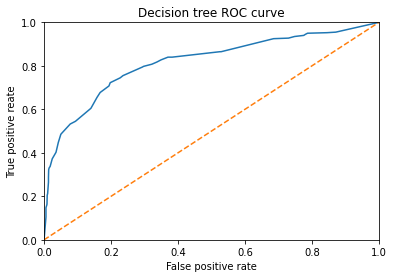

In [12]:
# Optimal decision tree model 
ad_model_imbalance = DecisionTreeClassifier(max_depth=7, random_state=54321)
ad_model_imbalance.fit(features_train, target_train)

print('Classification metrics')

# F1 score
predicted_valid = ad_model_imbalance.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# Precisión
print('Precision:', precision_score(target_valid, predicted_valid))

# Recall
print('Recall:   ', recall_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = ad_model_imbalance.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive reate')
plt.title('Decision tree ROC curve')
plt.show()

The decision tree model has a depth of 7 which obtained an **F1 score of 0.57 and an AUC-ROC value of 0.81**.

According to the Recall value, our model identifies true positives only 48.5% of the time. Regarding the Precision, the model only has 70%, so the model has deficiencies when identifying false positives.

According to the AUC-ROC and the ROC curve, we can see that the model is far from having a score of 100, leaving room for improvement.

## Random forest with imbalance

We are now going to build a random forest model, in this model we are going to optimize two hyperparameters `max_depth` and `n_estimators` that determine the depth and number of trees to consider respectively. The `random_state` hyperparameter will be held with a constant value of `54321`. Like the decision tree we are going to select the best model based on its F1 score.

In [11]:
# Characteristics of the optimal model
best_ba_f1_score = 0 # Returns highest F1 score
best_est = 0         # Returns best estimator number
best_ba_depth = 0    # Returns best depth

for est in range(1, 101, 10):
    for depth in range(1,11):
        ba_model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) 
        ba_model.fit(features_train, target_train) 
        predicted_valid = ba_model.predict(features_valid) 
        ba_f1_score = f1_score(target_valid, predicted_valid)
        if ba_f1_score > best_ba_f1_score:
            best_ba_f1_score = ba_f1_score # Model with best f1 score
            best_est = est        # Optimal n_estimators
            best_ba_depth = depth # Optimal max_depth

print("F1 of the best model in the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_ba_depth, best_ba_f1_score))

F1 of the best model in the validation set (n_estimators = 71, max_depth = 10): 0.5611745513866231


The best random forest model, based on its **F1 (0.56) score, is made up of 71 decision trees with a depth of 10**. We are going to build a model with these hyperparameters and calculate its precision, recall and AUC-ROC.

Classification metrics
F1 score:  0.5611745513866231
Precision: 0.8075117370892019
Recall:    0.43
AUC-ROC:   0.8634687500000001


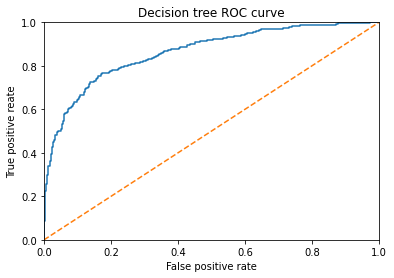

In [13]:
# Optimal random forest model
ba_model_imbalance = RandomForestClassifier(n_estimators=71, max_depth=10, random_state=54321)
ba_model_imbalance.fit(features_train, target_train)

print('Classification metrics')
# F1 score
predicted_valid = ba_model_imbalance.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# Precisión
print('Precision:', precision_score(target_valid, predicted_valid))

# Recall
print('Recall:   ', recall_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = ba_model_imbalance.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive reate')
plt.title('Decision tree ROC curve')
plt.show()

Our best random forest model had an **F1 score of 0.56 and an AUC-ROC of 0.86** being slightly better than the decision tree model.

However, the sensitivity score (recall) is lower than that of the decision tree since the model recognizes true positives in 43% of cases. Regarding precision, the model has 80.75%.

According to the AUC-ROC curve, the model has a score of 86.3%.

## Logistic regression with imbalance

Finally, we are going to build a logistic regression classification model. In this model the only hyperparameter to define is `random_state` with a value of `54321`. The model will be evaluated using the same metrics as the previous models.

F1 score:  0.3013698630136986
Precision: 0.6936936936936937
Recall:    0.1925
AUC-ROC:   0.7810750000000001


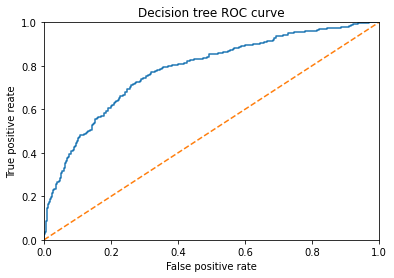

In [14]:
# Logistic regression
rl_model_imbalance = LogisticRegression(random_state=12345, solver='liblinear')
rl_model_imbalance.fit(features_train, target_train) 

# F1 Score
predicted_valid = rl_model_imbalance.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# Precisión
print('Precision:', precision_score(target_valid, predicted_valid))

# Recall
print('Recall:   ', recall_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = rl_model_imbalance.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive reate')
plt.title('Decision tree ROC curve')
plt.show()

Our logistic regression model yielded an **F1 score of 0.30 and an AUC-ROC of 0.78**. According to the sensitivity of the model (racall), it only identifies true positives 19.25% of the time. The accuracy of the model is only 69%, so it has a high incidence of false positives. Based on the AUC-ROC value, the model has a large margin for improvement (78%) as it is far from 100%.

## Conclusions: models with class imbalance

The quality of the models built with imbalance can be observed in the following table, the numbers in bold indicate the highest scores for each metric obtained in each model (`DT`: decision tree, `RF`: random forest, `LR` : Logistic regression).

|   Métrica   |  `DT` | `RF`  |  `LR` |
| ----------- | ----- | ----- | ----- |
|   **F1**    |**0.57**| 0.56 | 0.30 |
| **AUC-ROC** |   0.81 | **0.86** | 0.78 |
|**Precision**| 0.70   | **0.80** | 0.69 |
| **Recall**  | **0.48** | 0.43 | 0.19 |

The random forest model obtained the highest scores in two metrics (AUC-ROC and Precision) and the second best F1 score, being surpassed by the decision tree model. However, due to the imbalance of classes, the models may be affected in their performance. In the next stage of the project, he will address the class imbalance.

# Model improvement

In this third stage we are going to improve the quality of the models by addressing class imbalance through three approaches:

* **Adjustment of class weights**: by modifying the `class_weight` hyperparameter
* **Oversampling** (_upsampling_): by multiplying the rare classes (i.e. people who close their account)
* **Subsampling** (_downsampling_): by randomly eliminating negative cases (i.e. people who maintain their account).

## Adjustment of class weights

We are going to rebuild the models selected in the previous step but modifying the `class_weight = 'balanced'` hyperparameter. This modification makes the rare classes have balanced weights compared to the more frequent classes.

The comparison of the quality between models with and without class balance will be made through the F1 score and the AUC-ROC.

### Decision tree with balanced classes

In [15]:
# Decision tree with class_weight='balanced'
ad_model_wb = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=54321)
ad_model_wb.fit(features_train, target_train)

# F1 score
predicted_valid = ad_model_wb.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = ad_model_wb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

F1 score:  0.5489443378119001
AUC-ROC:   0.8124179687499999


### Random forest with balanced classes

In [16]:
# Random Forest with class_weight='balanced'
ba_model_wb = RandomForestClassifier(n_estimators=71, max_depth=10, class_weight='balanced', random_state=54321)
ba_model_wb.fit(features_train, target_train)

# F1 score
predicted_valid = ba_model_wb.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = ba_model_wb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

F1 score:  0.6125461254612548
AUC-ROC:   0.8566999999999999


### Logistic regression with balanced classes

In [17]:
# Logistic regression with class_weight='balanced'
rl_model_wb = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear')
rl_model_wb.fit(features_train, target_train) 

# F1 Score
predicted_valid = rl_model_wb.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = rl_model_wb.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

F1 score:  0.5127753303964758
AUC-ROC:   0.7851609375


### Comparison of models with and without class balance

We have built the same models selected in the previous stage but with the `class_weight='balanced'` hyperparameter. For these new models, the F1 and AUC-ROC scores have been calculated. The following tables will show the effect of changing `class_weight` on each metric.

**F1-score**

| Model  | `None` | `Balanced` | Effect |
| ------ | ------ | ---------- | ------ |
| **DT** |**0.57**|    0.54    | worse  |
| **RF** |  0.55  |  **0.62**  | improve|
| **LR** |  0.30  |  **0.51**  | improve|

**AUC-ROC**

| Modelo | `None` | `Balanced` | Efecto |
| ------ | ------ | ---------- | ------ |
| **DT** |  0.81  |    0.81    | same   |
| **RF** |  0.86  |    0.86    | same   |
| **LR** |  0.78  |    0.78    | same   |

The effect of changing from `class_weight='None'` to `class_weight='balanced'` does not have a constant improving effect across all models. Class balance only improves the F1 score of the random forest and logistic regression models. We are going to try other approaches to improve the quality of the models.

## Upsampling

Through the oversampling approach or _upsampling_, the class imbalance is compensated by increasing the number of observations of the rare classes to be in balance with the most common class. Again we are going to build the classification model but with a new set of balanced data.

First we are going to define a function to create the new dataset, then we will train the models with oversampling and evaluate their quality using the F1 and AUC-ROC metrics.

In [18]:
# Upsampling function: upsample

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [19]:
# Training set with upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape,'\n')

# Class balance 
print(target_upsampled.value_counts())

(9636, 11)
(9636,) 

1    4848
0    4788
Name: Exited, dtype: int64


Now that we have the training set balanced using the oversampling technique, we are going to rebuild the decision tree, random forest, and logistic regression models. We are going to compare the F1 and AUC-ROC metrics to determine the improvement of the model and select the best model with oversampling.

### Decision tree with upsampling

In [20]:
best_ad_model = None 
best_ad_f1_score = 0 
best_ad_depth = 0    

for depth in range(1, 11):  
    ad_model = DecisionTreeClassifier(max_depth=depth, random_state=54321) 
    ad_model.fit(features_upsampled, target_upsampled) 
    predicted_valid = ad_model.predict(features_valid) 
    ad_f1_score = f1_score(target_valid, predicted_valid)
    if ad_f1_score > best_ad_f1_score:
        best_ad_model = ad_model
        best_ad_f1_score = ad_f1_score
        best_ad_depth = depth

print(f"F1 score best model (max_depth={best_ad_depth}):", best_ad_f1_score) 

F1 score best model (max_depth=8): 0.5636743215031316


In [21]:
# Best decision tree with upsampling
ad_model_upsam = DecisionTreeClassifier(max_depth=8, random_state=54321)
ad_model_upsam.fit(features_upsampled, target_upsampled)

# AUC-ROC
probabilities_valid = ad_model_upsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8104265625


**The best decision tree model has a depth of 8 and an F1 score of 0.56 and an AUC-ROC of 0.81**. This represents a slight improvement in the F1 score over the class-balanced model but does not show any substantial change in the model's AUC-ROC value.

### Random forest with upsampling

In [22]:
best_ba_f1_score = 0 
best_est = 0   
best_ba_depth = 0

for est in range(1, 101, 10): 
    for depth in range(1,11): 
        ba_model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)
        ba_model.fit(features_upsampled, target_upsampled) 
        predicted_valid = ba_model.predict(features_valid) 
        ba_f1_score = f1_score(target_valid, predicted_valid)
        if ba_f1_score > best_ba_f1_score:
            best_ba_f1_score = ba_f1_score 
            best_est = est        
            best_ba_depth = depth 

print("F1 best model over validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_ba_depth, best_ba_f1_score))

F1 best model over validation set (n_estimators = 81, max_depth = 8): 0.6230200633579726


In [23]:
# Best random forest with upsampling 
ba_model_upsam = RandomForestClassifier(random_state=54321, n_estimators=81, max_depth=8)
ba_model_upsam.fit(features_upsampled, target_upsampled)

# AUC-ROC
probabilities_valid = ba_model_upsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8648437500000001


The best random forest model consists of 81 trees with a depth of 8. The **F1 score was 0.62 with an AUC-ROC of 0.86**. Despite the oversampling class balance, the model did not substantially improve its quality metrics with respect to the balanced class model.

### Logistic regression with upsampling

In [24]:
# Logistic regression model
rl_model_upsam = LogisticRegression(random_state=12345, solver='liblinear')
rl_model_upsam.fit(features_upsampled, target_upsampled)

# F1 Score
predicted_valid = rl_model_upsam.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = rl_model_upsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

F1 score:  0.5139372822299653
AUC-ROC:   0.7851625000000001


Our logistic regression model had an F1 score of 0.51 and an AUC-ROC of 0.78. Oversampling had no effect on the model's quality metrics.

Now we are going to build the models using another approach, subsampling.

## Downsampling

Using the downsampling approach, class imbalance is addressed by randomly removing observations with the most frequent class (i.e. negatives in this case - customers who keep their account). We are going to build a new training set and train, select and evaluate the models in the same way as in the previous section.

First we are going to define a function to create the new subsampled data set.

In [25]:
# Dowsampling function: downsample

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [26]:
# Dowsampled training set
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape,'\n')

# Class balance
print(target_downsampled.value_counts())

(2409, 11)
(2409,) 

1    1212
0    1197
Name: Exited, dtype: int64


Now that we have the training set balanced using the subsampling technique, we are going to rebuild the decision tree, random forest, and logistic regression models.

### Decision tree with dowsampling

In [27]:
# Decision tree
best_ad_model = None 
best_ad_f1_score = 0 
best_ad_depth = 0    

for depth in range(1, 11):  
    ad_model = DecisionTreeClassifier(max_depth=depth, random_state=54321) 
    ad_model.fit(features_downsampled, target_downsampled) 
    predicted_valid = ad_model.predict(features_valid) 
    ad_f1_score = f1_score(target_valid, predicted_valid) 
    if ad_f1_score > best_ad_f1_score:
        best_ad_model = ad_model
        best_ad_f1_score = ad_f1_score
        best_ad_depth = depth

print(f"F1 score best model (max_depth={best_ad_depth}):", best_ad_f1_score) 

F1 score best model (max_depth=7): 0.5519779208831646


In [28]:
# Optimal decision tree
ad_model_subsam = DecisionTreeClassifier(max_depth=7, random_state=54321)
ad_model_subsam.fit(features_downsampled, target_downsampled)

# AUC-ROC
probabilities_valid = ad_model_subsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8247296875


The decision tree had an optimal depth of 7 and obtained an **F1 score of 0.55 and an AUC-ROC of 0.82**.

### Random forest with dowsampling

In [29]:
# Random forest
best_ba_f1_score = 0 
best_est = 0   
best_ba_depth = 0 

for est in range(1, 101, 10): 
    for depth in range(1,11): 
        ba_model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth) 
        ba_model.fit(features_downsampled, target_downsampled) 
        predicted_valid = ba_model.predict(features_valid) 
        ba_f1_score = f1_score(target_valid, predicted_valid)
        if ba_f1_score > best_ba_f1_score:
            best_ba_f1_score = ba_f1_score 
            best_est = est 
            best_ba_depth = depth 

print("F1 best model over the validation set (n_estimators = {}, max_depth = {}): {}".format(best_est, best_ba_depth, best_ba_f1_score))

F1 best model over the validation set (n_estimators = 31, max_depth = 7): 0.5908649173955297


In [30]:
# Best random forest model
ba_model_downsam = RandomForestClassifier(random_state=54321, n_estimators=31, max_depth=7)
ba_model_downsam.fit(features_downsampled, target_downsampled)

# AUC-ROC
probabilities_valid = ba_model_downsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8561625


The optimal random forest model consists of 31 trees with a maximum depth of 7. The F1 score was 0.59 and an AUC-ROC of 0.85.

### Logistic regression with downsampling

In [31]:
# Logistic regression
rl_model_downsam = LogisticRegression(random_state=12345, solver='liblinear')
rl_model_downsam.fit(features_downsampled, target_downsampled) 

# F1 Score
predicted_valid = rl_model_downsam.predict(features_valid)
print('F1 score: ', f1_score(target_valid, predicted_valid))

# AUC-ROC
probabilities_valid = rl_model_downsam.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_valid, probabilities_one_valid))

F1 score:  0.5008635578583766
AUC-ROC:   0.7843328125


The undersampled logistic regression model had an F1 score of 0.50 and an AUC-ROC of 0.78.

## Model Comparison

So far we have built three classification models with different data sets with and without class imbalance:

* Class imbalance (`None`)
* Class weight balancing (`Balanced`)
* `Upsampled`
* `Downsampled`

Next we are going to compare in a tabular way the F1 and AUC-ROC metrics of each model (`DT`: decision tree, `RF`: random forest and `LR`: logistic regression)

### F1 under different scenarios

In the following table, the value of F1 of each model can be compared under different approaches to deal with class imbalance. The numbers in bold show the models with the highest F1 scores across different approaches to dealing with class imbalance.

| Model  | `None` | `Balanced` | `Upsampled` | `Downsampled` |
| ------ | ------ | ---------- | ----------- | ------------- |
|  `DT`  |  0.57  |    0.54    |     0.56    |      0.55     |
|  `RF`  |  0.56  |  **0.62**  |   **0.62**  |      0.59     |
|  `LR`  |  0.30  |    0.51    |     0.51    |      0.50     |

The model that showed the best F1 score is the **class-balanced random forest** using the `class_weight='balanced'` hyperparameter and using **oversampling**.


### AUC-ROC under different scenarios

The following table compares the AUC-ROC values under different approaches. The numbers in bold show the highest AUC-ROC values of all models under different approaches.

| Model  | `None` | `Balanced` | `Upsampled` | `Downsampled` |
| ------ | ------ | ---------- | ----------- | ------------- |
|  `DT`  |  0.81  |    0.81    |     0.81    |      0.82     |
|  `RF`  |**0.86**|  **0.86**  |     0.84    |      0.85     |
|  `LR`  |  0.78  |    0.78    |     0.78    |      0.78     |

The highest AUC-ROC score was again obtained by the **random forest model without and with class balance** using the `class_weight='balanced'` hyperparameter.

## Conclusions

The model that showed the best F1 and AUC-ROC scores was the **random forest with class balance**. The F1 value obtained by this model was 0.62, exceeding the model selection threshold of 0.59.

# Final test of the model

Next we are going to train the best selected model with the training and validation set and determine its quality with the test set.

Remember that the best model was a random forest with the following hyperparameters:
* `n_estimators`: 71
* `max_depth`: 10
* `class_weight`: 'balanced'

In [32]:
# Concatenation of training and validation sets into 'df_tv'
df_tv = pd.concat([df_train, df_valid], axis=0)
print('Size final training data set:', len(df_tv))

# Features 'features_tv'
features_tv = df_tv.drop('Exited', axis=1)

# Target 'target_tv'
target_tv = df_tv['Exited']

Size final training data set: 8000


Now proceed to train the final model and validate it against the test suite.

F1 score:  0.6469248291571754
AUC-ROC:   0.8673508870214754


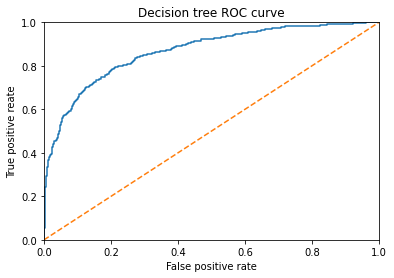

In [33]:
# Final model 
model_final = RandomForestClassifier(n_estimators=71, max_depth=10, class_weight='balanced', random_state=54321)
model_final.fit(features_tv, target_tv)


# F1 score
predicted_valid = model_final.predict(features_test)
print('F1 score: ', f1_score(target_test, predicted_valid))

# AUC-ROC
probabilities_test = model_final.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('AUC-ROC:  ',roc_auc_score(target_test, probabilities_one_test))


# Curva ROC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive reate')
plt.title('Decision tree ROC curve')
plt.show()

## Conclusion final model

In this project, different classification models were built based on the characteristics and behavior of their clients to determine if a client would close (class `1`) or not (class `0`) their bank account. Approximately 20% of users close their bank account. Due to the class imbalance, different models were built with different strategies to solve this characteristic of the data (class balance, oversampling and undersampling). A model that does not take class imbalance into account may underperform in correctly predicting whether or not a customer will close their account.

Prior to building the models under different approaches to balance the classes, the categorical variables were coded (using the OHE technique) and the numerical variables were standardized to train the classification models.

The model with the highest quality according to the F1 score and AUC-ROC was a random forest with class balance using the `class_weight = 'balanced'` hyperparameter. This model, trained on the training and validation data, had an **F1** score of **~0.65** when tested with the test set. This F1 value exceeds the threshold of 0.59 required. The **AUC-ROC** score remained at **0.86**.